# Modelo predictivo 🔮

*Elaboración de un modelo predictivo para la variable Attrition. Selección del modelo predictivo más fiable. Exportación del modelo para uso de usuario.*

## Índice 📎

1. Exportación de librerías
2. Importación de los datos
3. Modelos
>- Logistic Regression
>- Decision Tree
>- Random Forest Classifier
4. Escogiendo el mejor modelo

## 1. Exportación de librerias 📚

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

## 2. Importación de los datos 📉

In [10]:
data = pd.read_csv("Data/Attrition_modeldata.csv")
data.drop("Unnamed: 0",axis=1, inplace=True)

In [12]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## 3. Modelos 🧙🏻‍♀️

Antes de diseñar el modelo predictivo convertiremos algunas columnas "manualmente" de númerica a categórica (para el caso de aquellas que dispongan de pocos valores únicos), mientras que para el resto lo realizaremos mediante get dummies.

In [13]:
#observamos que variables categoricas disponemos actualmente
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

⚠️ *OJO: Algunas variables que eran catégoricas las transformamos a númericas en el jupyter anterior (1. Exploración de los Datos), mediante rankings como es el caso de JobSatisfaction o PerformanceRating.*

Actualmente tenemos 8 columnas con datos categóricos, de los cuales sus valores únicos son:

In [14]:
#extraemos los valores únicos de cada variable
categoricas ={"Attrition": data["Attrition"].unique(),
"BusinessTravel": data["BusinessTravel"].unique(),
"Department":data["Department"].unique(),
"EducationField":data["EducationField"].unique(),
"Gender": data["Gender"].unique(),
"JobRole": data["JobRole"].unique(),
"MaritalSatus":data["MaritalStatus"].unique(),
"OverTime": data["OverTime"].unique(),
}
pd.Series(categoricas)

Attrition                                                 [Yes, No]
BusinessTravel       [Travel_Rarely, Travel_Frequently, Non-Travel]
Department         [Sales, Research & Development, Human Resources]
EducationField    [Life Sciences, Other, Medical, Marketing, Tec...
Gender                                               [Female, Male]
JobRole           [Sales Executive, Research Scientist, Laborato...
MaritalSatus                            [Single, Married, Divorced]
OverTime                                                  [Yes, No]
dtype: object

Una vez conocemos las variables categóricas y sus valores únicos procederemos a cambiar manualmente aquellas de las que disponen de dos valores sustituyendolos por 1 y 0, para el resto utilizaremos el ya mencionado método get.dummies.

- Attrition

In [15]:
valores= {"Yes":1, "No":0} #definimos los nuevos valores
data["Attrition"] = data["Attrition"].apply(lambda x: valores[x]) #reestablecemos los valores

- Gender

In [16]:
valores2= {"Female":1, "Male":0} #definimos los nuevos valores
data["Gender"] = data["Gender"].apply(lambda x: valores2[x]) #reestablecemos los valores

- OverTime

In [17]:
valores3= {"Yes":1, "No":0} #definimos los nuevos valores
data["OverTime"] = data["OverTime"].apply(lambda x: valores3[x]) #reestablecemos los valores

In [18]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,1,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,1,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,0,...,3,4,1,6,3,3,2,2,2,2


- Resto de valores

In [19]:
data = pd.get_dummies(data)
data.shape

(1470, 50)

In [22]:
#nuevas columnas generadas
data.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Re

*Una vez tenemos los datos tratados y bien estructurados procederemos a la creación de diferentes modelos predictivos, el objetivo será quedarnos con aquel cuya métrica de error, nos reporte los resultados más fiables.*

### 3.1 Logistic Regression 📊

In [23]:
#definimos nuestras variables x e y
X= data.drop("Attrition", axis=1)
y= data["Attrition"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [25]:
lr= LogisticRegression(max_iter=10000) #creamos el modelo
lr.fit(X_train,y_train) #entrenamos el modelo

LogisticRegression(max_iter=10000)

In [26]:
#predecimos
y_predict = lr.predict(X_test) #testeo
y_predict_train = lr.predict(X_train) #entrenamiento

In [27]:
#métrica de error
logistic = {
        "Accuracy Test": accuracy_score(y_predict, y_test).round(3) ,
        "MSE Test": mean_squared_error(y_predict, y_test).round(3) ,
        "Precision score": precision_score(y_predict, y_test).round(3) ,
        "Recall score": recall_score(y_predict, y_test).round(3) ,
        "F1 score": f1_score(y_predict, y_test).round(3)}
pd.Series(logistic)

Accuracy Test      0.857
MSE Test           0.143
Precision score    0.256
Recall score       0.435
F1 score           0.323
dtype: float64

### 3.2 Decision Tree 🌲

In [28]:
#definimos nuestras variables x e y
X= data.drop("Attrition", axis=1)
y= data["Attrition"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [30]:
dc= DecisionTreeClassifier() #creamos el modelo
dc.fit(X_train,y_train) #entrenamos el modelo

DecisionTreeClassifier()

In [31]:
#predecimos
y_predict = dc.predict(X_test) #testeo
y_predict_train_dc = dc.predict(X_train) #entrenamiento

In [32]:
#métrica de error
tree = {
        "Accuracy Test": accuracy_score(y_predict, y_test).round(3) ,
        "MSE Test": mean_squared_error(y_predict, y_test).round(3) ,
        "Precision score": precision_score(y_predict, y_test).round(3) ,
        "Recall score": recall_score(y_predict, y_test).round(3) ,
        "F1 score": f1_score(y_predict, y_test).round(3)}
pd.Series(tree)

Accuracy Test      0.755
MSE Test           0.245
Precision score    0.205
Recall score       0.163
F1 score           0.182
dtype: float64

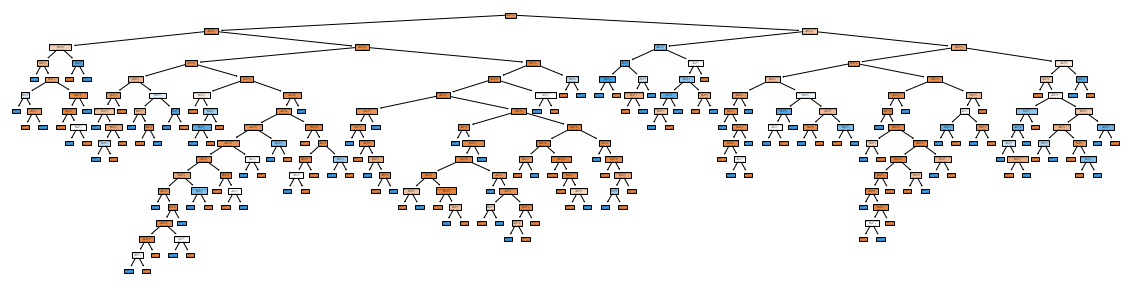

In [33]:
#visualizamos nuestro arbol de decision
fig = plt.figure(figsize=(20, 5))
plot_tree(dc, feature_names=X.columns, filled=True);

<AxesSubplot:>

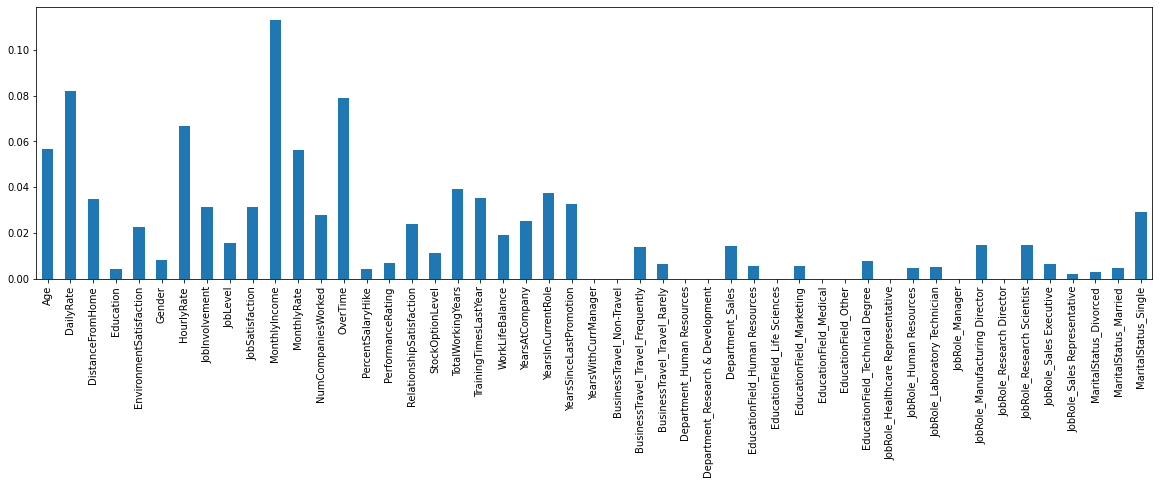

In [34]:
#importancia de las variables
feat_importances = pd.Series(dc.feature_importances_, index= X.columns)
fig = plt.figure(figsize=(20, 5))
feat_importances.plot(kind="bar")

### 3. 3 Random Forest Classifier 🌳

In [35]:
#definimos nuestras variables x e y
X= data.drop("Attrition", axis=1)
y= data["Attrition"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [37]:
rf= RandomForestClassifier() #creamos el modelo
rf.fit(X_train,y_train) #entrenamos el modelo

RandomForestClassifier()

In [38]:
#predecimos
y_predict = rf.predict(X_test) #testeo
y_predict_train = rf.predict(X_train) #entrenamiento

In [39]:
#métrica de error
randomforest = {
        "Accuracy Test": accuracy_score(y_predict, y_test).round(3) ,
        "MSE Test": mean_squared_error(y_predict, y_test).round(3) ,
        "Precision score": precision_score(y_predict, y_test).round(3) ,
        "Recall score": recall_score(y_predict, y_test).round(3) ,
        "F1 score": f1_score(y_predict, y_test).round(3)}
pd.Series(randomforest)

Accuracy Test      0.874
MSE Test           0.126
Precision score    0.103
Recall score       0.667
F1 score           0.178
dtype: float64

<AxesSubplot:>

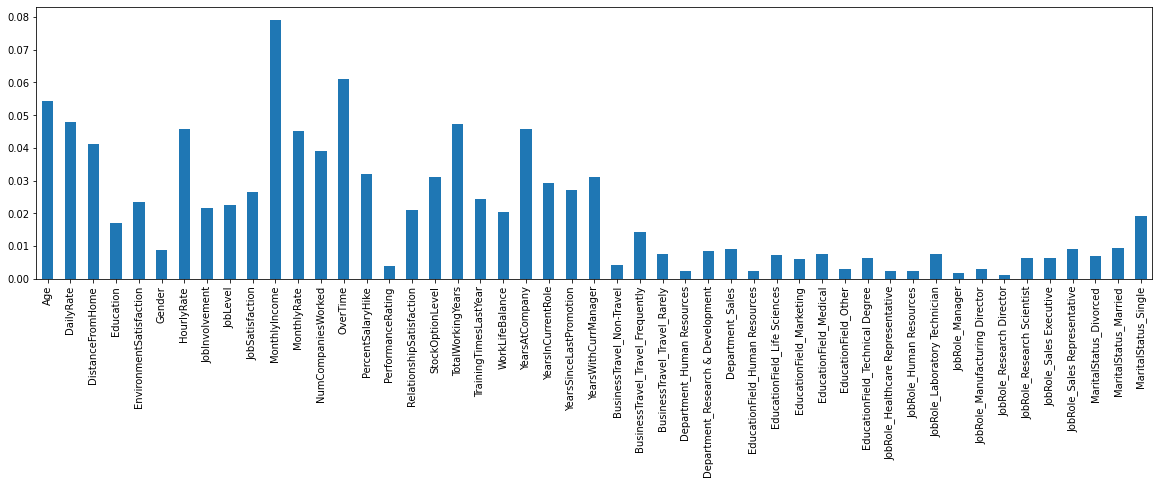

In [40]:
#importancia de las variables
feat_importances = pd.Series(rf.feature_importances_, index= X.columns)
fig = plt.figure(figsize=(20, 5))
feat_importances.plot(kind="bar")

## 4. Escogiendo el mejor modelo 🧐

Métricas empleadas para la toma de decisión:
- **Accuracy Test** nos da la calidad de la predicción: ¿qué porcentaje de los que hemos dicho que son la clase positiva, en realidad lo son?
- **Recall** nos da la cantidad: ¿qué porcentaje de la clase positiva hemos sido capaces de identificar?
- **F1** combina **Precision** y **Recall** en una sola medida

*[Fuente](https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/)*

In [41]:
#visualizamos las métricas de error de los tres modelos estudiados para facilitar la comparación. 
resultados = []
resultados.append(logistic)
resultados.append(tree)
resultados.append(randomforest)

In [42]:
comparacion = pd.DataFrame(resultados)
index = {"0":"Logistic Regression", "1":"Decision Tree", "2":"Random Forest"}
comparacion.rename(index = index)

,Accuracy Test,MSE Test,Precision score,Recall score,F1 score
0,0.857,0.143,0.256,0.435,0.323
1,0.755,0.245,0.205,0.163,0.182
2,0.874,0.126,0.103,0.667,0.178


<mark>Tomaremos como modelo de predicción el RandomForest ya que nos da un porcentaje de precisión bastante alto al igual que un exhaustividad bastante alta convirtiéndole en el modelo más fiable.<mark>